In [9]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google.colab'

# Netflix Stock Price Predictor
#  By
# Anubhav Karki (u3256634)
#  Darshan Sharma Phuyal (u3260441)
  This project is based on the Netflix stock price available from Kaggle repository (https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction)


*  The document presents a comprehensive analysis of Netflix stock price data over a five-year period, spanning from 2018 to 2022.
*  Our capstone project aims to develop a sophisticated machine learning model capable of accurately predicting whether Netflix stock prices will rise or fall within a predefined timeframe.
*  The approach entails a structured methodology, beginning with detailed data analysis and culminating in the construction of a predictive model.
*  Central to our strategy is the utilization of advanced machine learning and artificial intelligence algorithms, sourced from a variety of Python modules, packages, and classes.


In [ ]:
# Importing all the necessary libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Step 1: Reading the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NFLX.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/NFLX.csv'

In [ ]:
#Observing the shape of the dataset before removing duplicates
print(f"Before removing duplicates: {df.shape}")

Before removing duplicates: (1009, 7)


In [ ]:
# Removing duplicate rows if any
df = df.drop_duplicates()

In [ ]:
#Obeserving the shape of the dataset after removing duplicates
print(f"After removing duplicates: {df.shape}")

After removing duplicates: (1009, 7)


*  The shape of the Dataset remains the same as it does not have duplicate values.

Key observations from Step 1 about Data Description



*   The file contains 1008 Netflix stock price details
*   There are 7 attributes and they are outlined below:
*   Date: Date of of the stock shown
*   Open: price of stock when the stock market opened
*   High: Highest price the stock reached in a certain day
*   Low: Lowest price the stock reached in a certain day
*   Close: Closing stock price on a certain day
*   Adj Close: Round up price of stock for close price
*   Volume: How much the stock was sold in total in a day









Step 2: Problem Statement
Creating a prediction model to predict:

*   The stock price
*   Target Variable: Close
*   Support Variables: Open, High, Low, Adjusted Close, and Volume

Step 3: Choosing the appropriate ML/AI Algorithm for data Analysis

*  Based on the problem statement we need to create a supervised ML Regression model, as the target variable is Continious

Step 4: Looking at the class distribution( Target variable distribution to check if the
data is balanced or skewed)


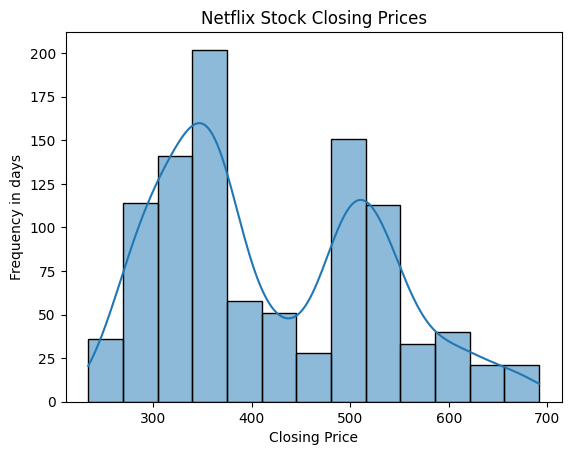

In [ ]:
sns.histplot(df['Close'], kde=True)
plt.title('Netflix Stock Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency in days')
plt.show()
# Creating a histogram as the data is Continious

Observations from Step 4

*  Multimodal Distribution of Target Variable: The data distribution of the target variable exhibits multimodal characteristics, indicating the presence of multiple peaks or modes. This suggests that the distribution is not unimodal and lacks the typical bell curve shape associated with a normal distribution.
As a result, the reliability of the data distribution may be compromised.
*  Outlier Analysis Required: Given the absence of a bell curve and the multimodal nature of the target variable's distribution, conducting an outlier analysis is imperative. Identifying and addressing outliers is essential to ensure the robustness and accuracy of subsequent analyses.
*  Sufficient Data Volume: It is noteworthy that there exists a sufficient number of observations for each type of value within the dataset. This ample data availability provides a solid foundation for learning and analysis tasks, facilitating meaningful insights and model development.


Step 5: Basic Exploratory Data Analysis

In [ ]:
# Looking at the top 5 sample rows in the data
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
# Looking at the bottom 5 sample rows in the data
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


Data Summarization Insights:

*  Data Types and Missing Values: Analysis of data types and missing values distribution was conducted. Variables with missing values exceeding 30% were marked for removal.
*  Exclusion of Inappropriate Qualitative Variables: Qualitative variables unsuitable for machine learning were identified and removed from the dataset.

In [ ]:
# Looking at the descriptive statistics of the data
df.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06


In [ ]:
# Finding the Correlation coefficient between datas given:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

correlation_col = df[col].corr()
print(correlation_col)

               Open      High       Low     Close  Adj Close
Open       1.000000  0.998605  0.998508  0.996812   0.996812
High       0.998605  1.000000  0.998203  0.998551   0.998551
Low        0.998508  0.998203  1.000000  0.998544   0.998544
Close      0.996812  0.998551  0.998544  1.000000   1.000000
Adj Close  0.996812  0.998551  0.998544  1.000000   1.000000


*  Dimensionality Reduction: When two variables have a correlation coefficient of 1, it means they are perfectly correlated, and one variable can be expressed linearly using the other. Including both variables in the analysis would not provide any additional information and would only increase the dimensionality of the dataset without adding value. By removing one of the variables, you reduce the number of features (dimensions), simplifying the model and potentially improving its performance.
*  Redundancy Reduction: Redundant variables, such as Close and Adjusted Close with a correlation coefficient of 1, introduce redundancy into the dataset. Redundancy can lead to overfitting, where the model learns noise in the data as if it were meaningful information. Removing redundant variables helps mitigate overfitting and improves the generalization ability of the model on unseen data.
*  Enhanced Interpretability: A model with fewer variables is often easier to interpret and understand. Removing highly correlated variables like Close and Adjusted Close streamlines the model's interpretability by focusing on the most relevant features. This can be crucial for stakeholders who need to comprehend and trust the model's predictions.

In [ ]:
# Finging unique values for each column to understand which column is categorical and which one is Continuous
df.nunique()

Date         1009
Open          976
High          983
Low           989
Close         988
Adj Close     988
Volume       1005
dtype: int64

Observations from Step 5: Basic explaratory Data Analysis

From the above data we can now select and list the data that we can use for further analysis:

*   Date: Categorical.Selected
*   High: Continuous.Selected
*   Low: Continuous.Unselected. This is unselected to reduce dimension, complexity and interpretability of the model.
*   Open: Continious.Selected
*   Close: Continuous.Selected. This is the target variable which needs to be predicted by the proposed regression model
*   Adj Close: Continuous.Unselected. The correlation coefficient of close and adj close is 1. This makes adjusted close a redundant value which complicates our data analysis.
*   Volume:  Continuous.Selected

*  Selected Variables: Date, High, Open, Close, Volume
*  Upon further investigation, selected variables can be removed upon further filtering.




Step 7: Removing Unwanted Columns


In [ ]:
df = df.drop(['Adj Close', 'Low'], axis=1)
print(df.head())

         Date        Open        High       Close    Volume
0  2018-02-05  262.000000  267.899994  254.259995  11896100
1  2018-02-06  247.699997  266.700012  265.720001  12595800
2  2018-02-07  266.579987  272.450012  264.559998   8981500
3  2018-02-08  267.079987  267.619995  250.100006   9306700
4  2018-02-09  253.850006  255.800003  249.470001  16906900


Step 8: Visual Exploratory Data *Analysis*

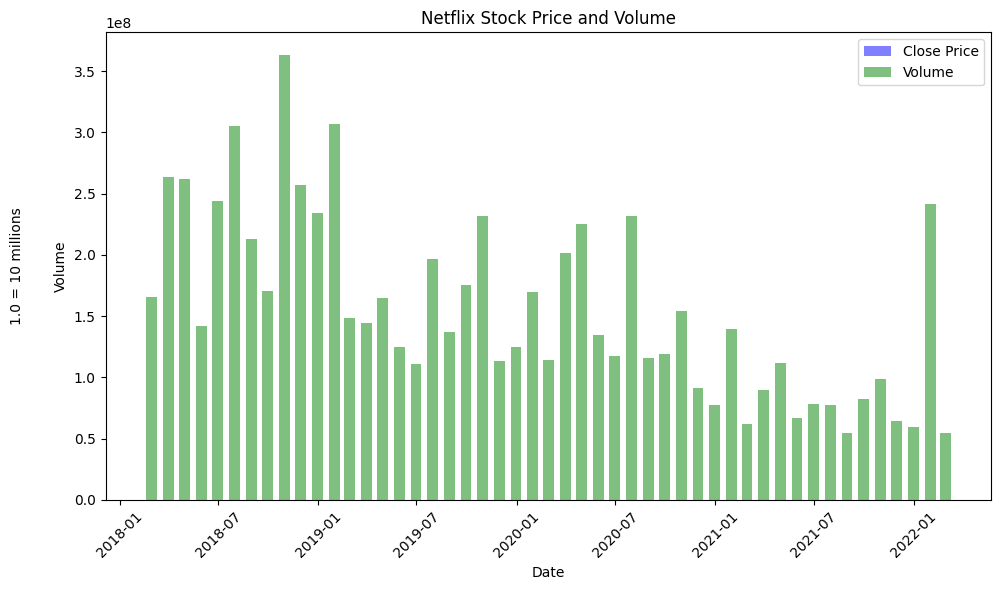

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])  #Converting the values from date column to datetime format

grouped_data = df.groupby(pd.Grouper(key='Date', freq='1M')).agg({'Close': 'mean', 'Volume': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))

bar_width = 20
plt.bar(grouped_data['Date'], grouped_data['Close'], color='blue', alpha=0.5, label='Close Price', width=bar_width)
plt.bar(grouped_data['Date'], grouped_data['Volume'], color='green', alpha=0.5, label='Volume', width=bar_width)

plt.title('Netflix Stock Price and Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.text(-0.1, 0.5, '1.0 = 10 millions', rotation=90, transform=plt.gca().transAxes, fontsize=10, va='center', ha='center')
plt.tight_layout()
plt.show()


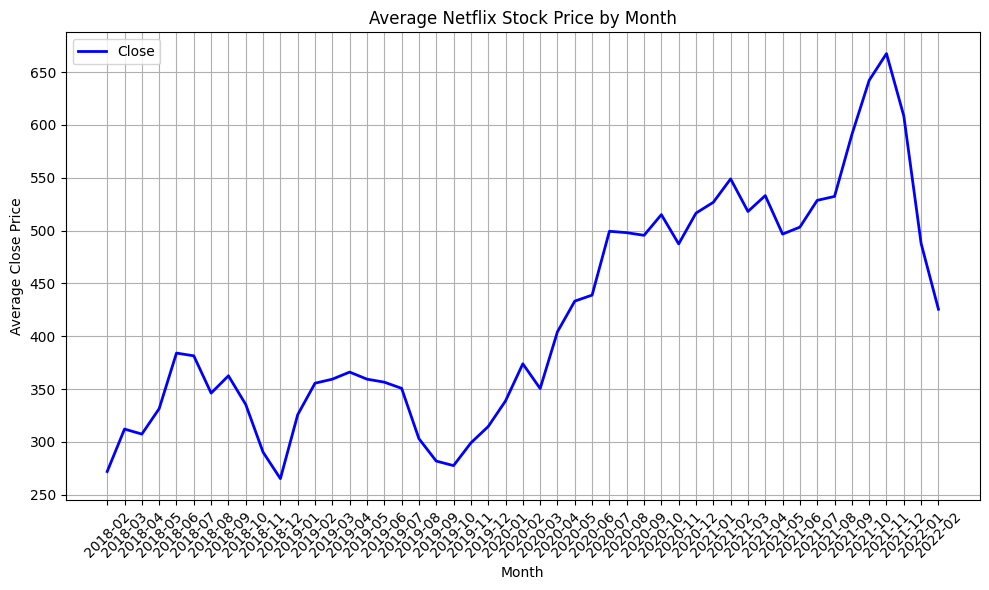

In [ ]:
from matplotlib.dates import DateFormatter

monthly_data = df.groupby(df['Date'].dt.to_period('M')).agg({'Close': 'mean'}).reset_index()

monthly_data['Date'] = monthly_data['Date'].dt.strftime('%Y-%m')

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Date'], monthly_data['Close'], color='blue', linewidth=2, label='Close')
plt.title('Average Netflix Stock Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Observation of Step 8: Visual Exploratory Data Analysis



*   From the above data we can observe that the volume of the stocks getting sold have been decreasing overall in the coming years and
*   The price of the stock has been gradually increasing over the years. There were fluctuations in the price sometimes but they have been consistently increasing overall compared to the first time when the stock recording started

Step 9: Visualize distribution of all the Continious predictor variables in the data using histograms.


*   Based on the Basic exploratory Data Analysis, there are ..... predictor variables 'Open', 'High', 'Close', and 'Volume'

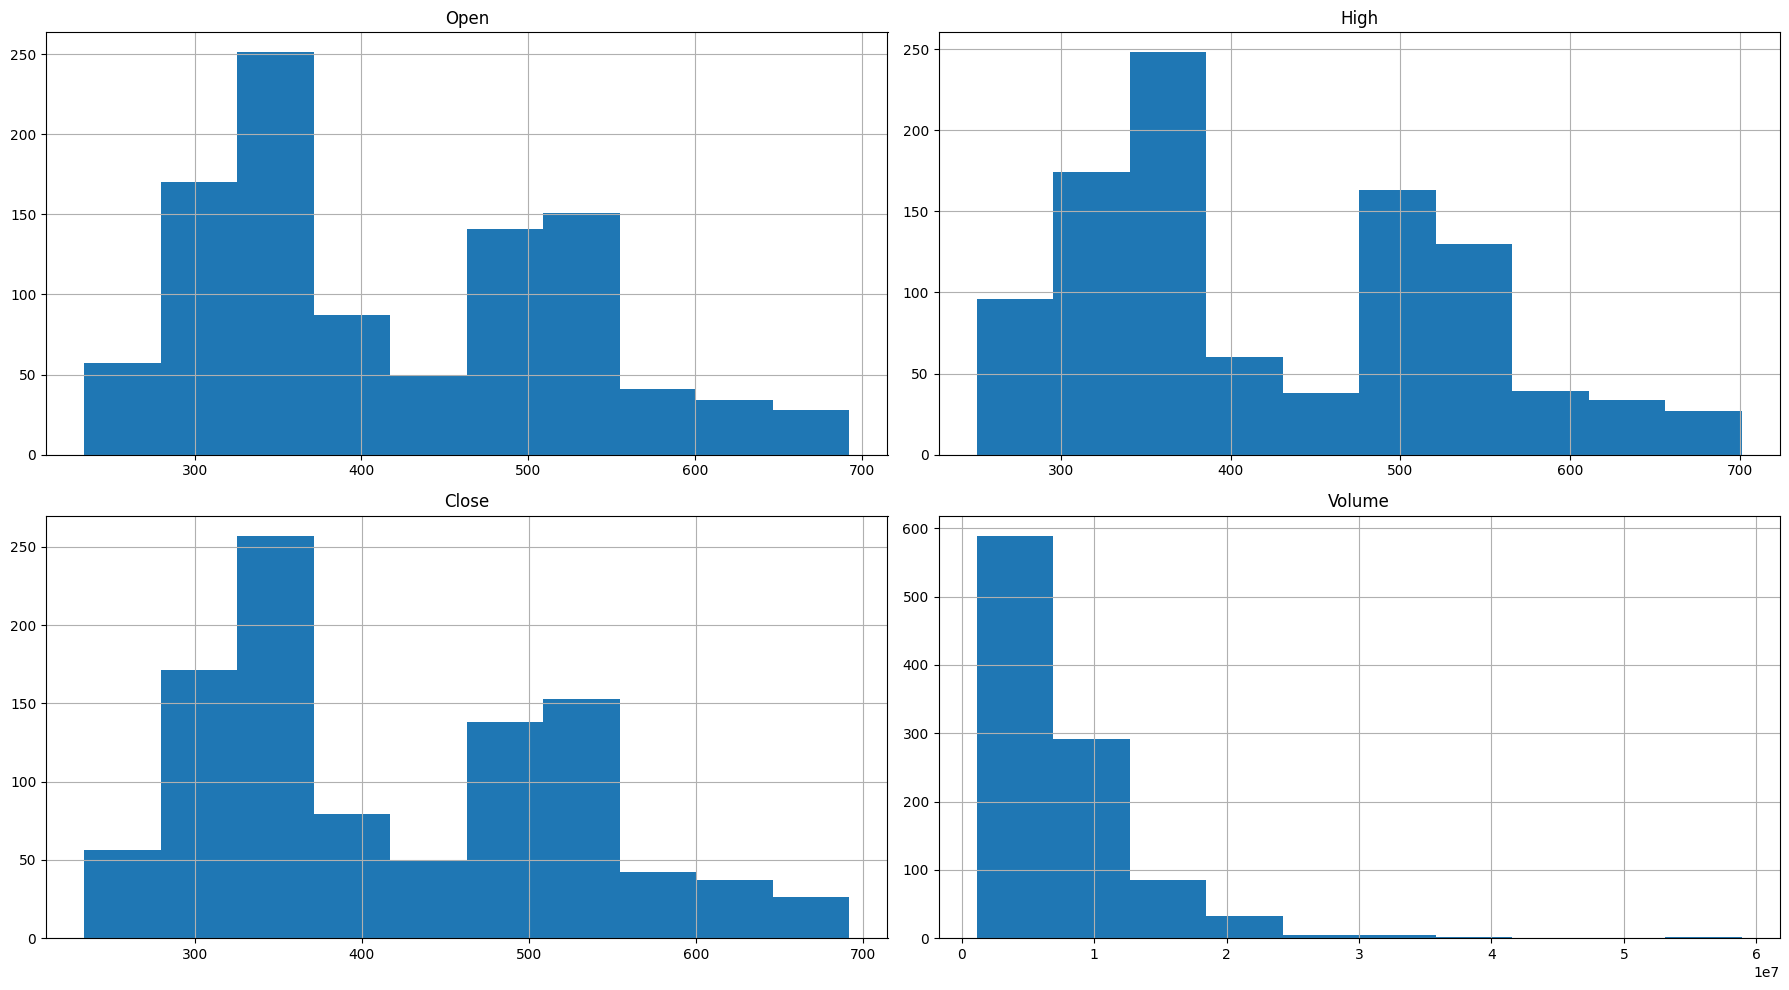

In [ ]:
# Plotting histograms of multiple columns together

df.hist(['Open', 'High', 'Close', 'Volume'], figsize=(18, 10))
plt.tight_layout()
plt.show()

Observations from Step 9:


*   The histogram shows us the data distribution for a single continious variable
*   The X-axis shows the range of values and the Y-axis shows us the number of instances for that value
*   For example, in the histograms of 'Open' and 'High', there are about 250 instances of the price being above 300 and below 400.
*   The ideal outcome for a histogram is thave a bell curve or s slightly skered bell curve.
*   If too much skewness is observed, outlier removal treatment should be done and the column should be reexamined so that does not solve the problem, we should reject the column/data attribute.

Step 10: Outlier Analysis
*  Outliers are extreme values in the data which are far away from most of the values
*  We can see spot them using a pair plot and confirm them by making a box plot of the seleted column.
*  Outlier must be treated one column/data at a time as the treatment will be slightly diferent for each column.
*   Reasons for analysing Outliers:
*  Outliers can bias the results and building of machine learning models.
*  The machine learning model go away from majority of data by focusing on the outlier to  try predict the right value.
*  There are two ways to treat outliers in the data
*  Either: Removing the outlier Records. Only if there are just few rows lost
*  Or: Instead of replacing outliers with random values, find a business-relevant number that makes sense in the context.
*  Let us make a pairplot to see what columns have outliers:

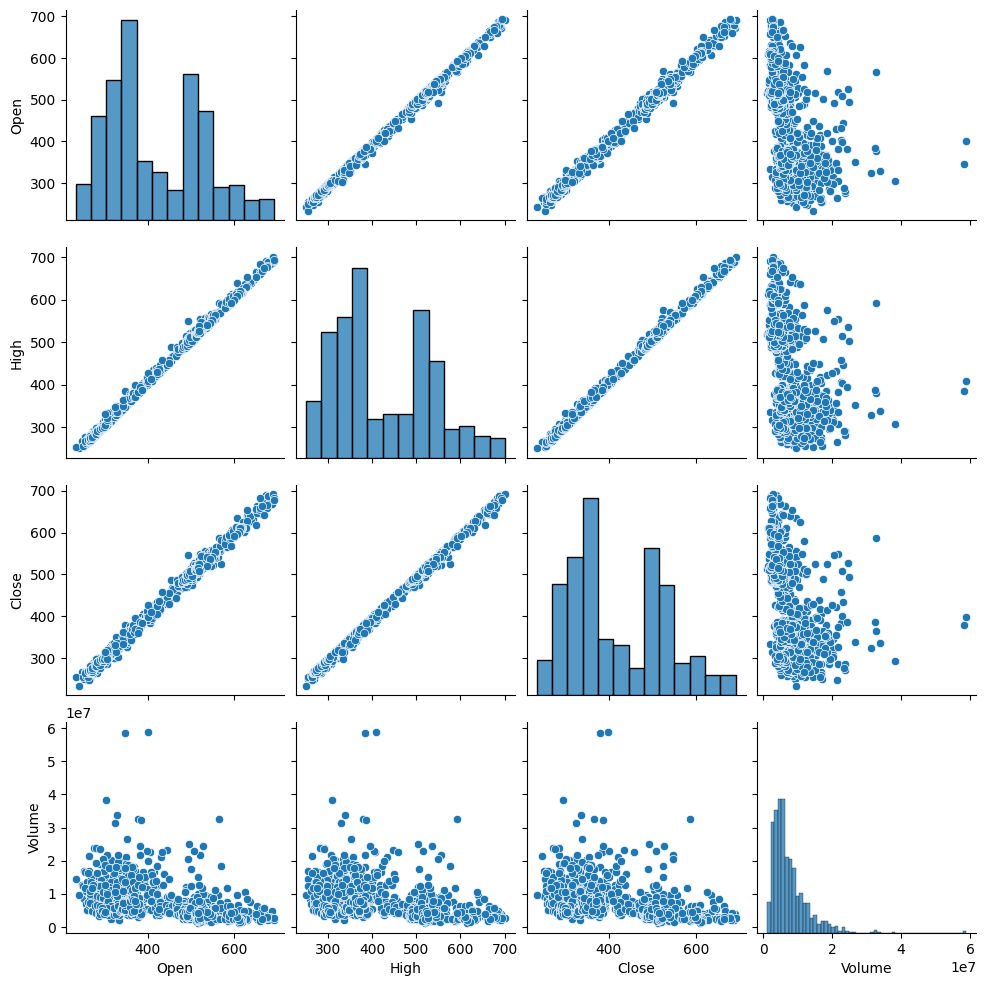

In [ ]:
# Pairplot
cv = ['Open', 'High', 'Close', 'Volume']

sns.pairplot(df[cv])
plt.show()

Observation From the scatterplot:
*  We can see that there are outliers in all the columns that has volume in it.
*  We need to make our histograms look more like a bell curve with little skewness as possible. We will approach that in the outlier removal process.
*  Let us now analyze the column 'Volume' in a Boxplot.

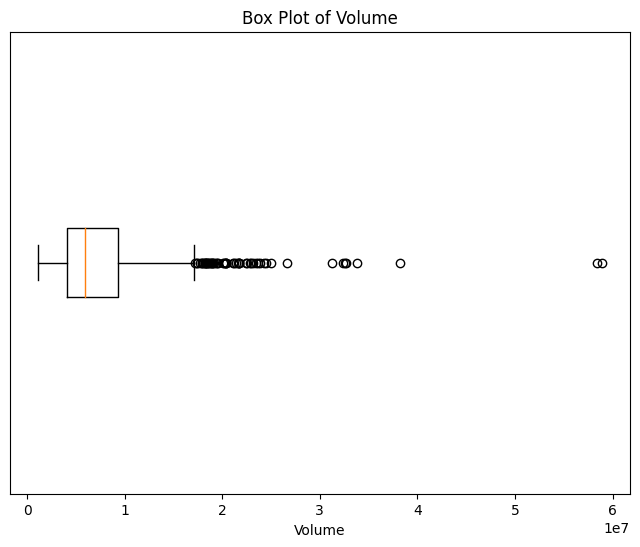

In [ ]:
# Boxplot of Volume:

plt.figure(figsize=(8, 6))
plt.boxplot(df['Volume'], vert=False)
plt.title('Box Plot of Volume')
plt.xlabel('Volume')
plt.yticks([])
plt.show()

*  We can see some unexpected values present in the volume column, which are present outside the whiskers of the boxplot from the figure above.
*  Now as we have identified the outliers we remove them from the volume column.

In [ ]:
# Quartiles
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Range of outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 1.1 * IQR

*  Q1 is the lower range
*  Q3 is the upper range
*  IQR is the InterQuartileRange
*  lower_bound is the lower bound of outliers (left whisker)
*  upper_bound is the upper bound of outliers (right whisker)
*  We have narrowed the upper bound so that we can find the outlier in much shorter range.

Text(0, 0.5, 'Volume')

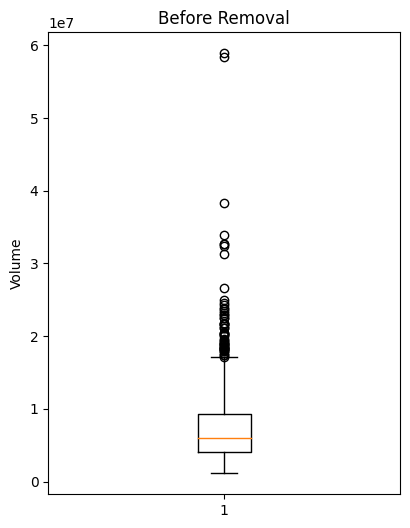

In [ ]:
# Before

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['Volume'])
plt.title('Before Removal')
plt.ylabel('Volume')

In [ ]:
# Removing Outliers for Volume

df = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]


In [ ]:
vc = ['High', 'Close', 'Open']
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (0.1 * IQR)  # Adjust the multiplier as needed
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for column in vc:
    df = remove_outliers(df, column)
    pass

Step 11: Visualising Data Distribution after outlier removal

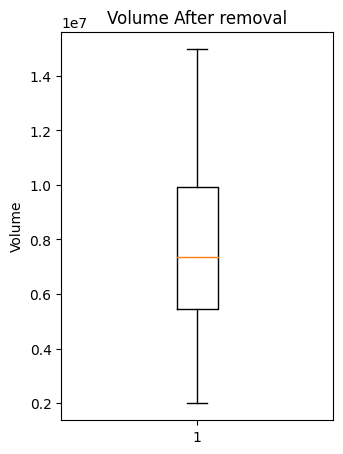

In [ ]:
plt.subplot(1, 2, 2)
plt.boxplot(df['Volume'])
plt.title('Volume After removal')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()

*  Now making the Histograms for Open, High and Volume bell curves using the same process we used to remove outliers in Volume.

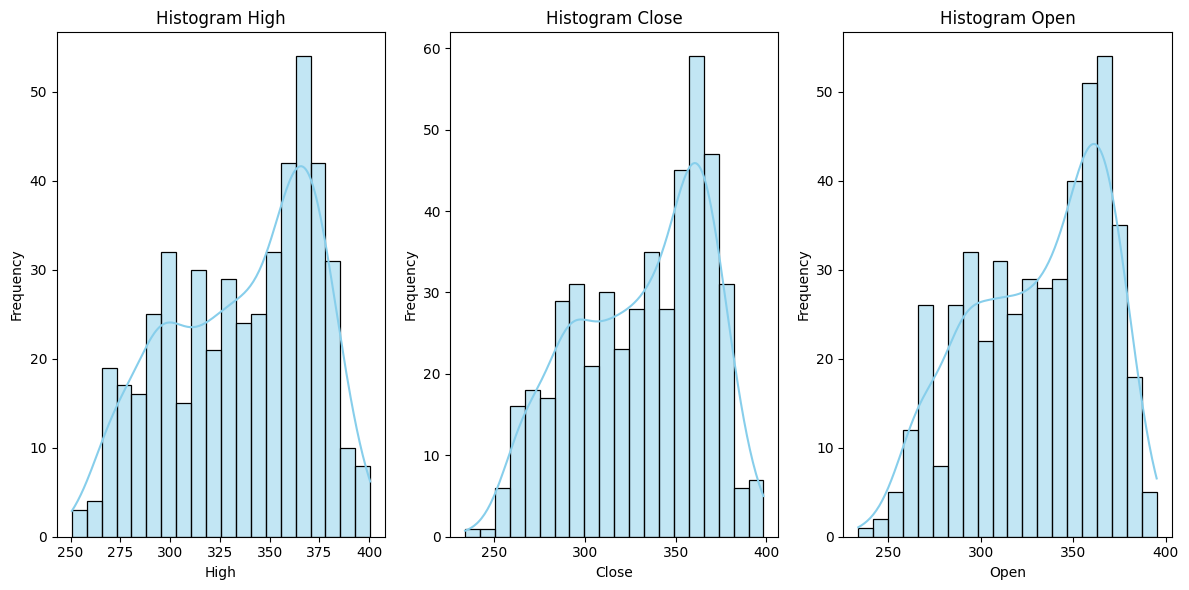

In [ ]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(vc, start=1):
    plt.subplot(1, len(vc), i)
    sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram {column}')


plt.tight_layout()
plt.show()


Observation: The columns have achieved a bell curve with little skewness compared to what was observed previously. The box plot from volume also has no outliers present after the outlier treatment.

Step 12: Missing Values Analysis
*  Missing values must be treated for each column seperately.
*  If a column has more than 30% data missing, the missing data treatment cannot be done and the column must be rejected.
*  If the column has less than 30% data missing we can choose either one of the following steps
*  Deleting missing value rows if any
*  Credit the missing values with MEDIAN values for continious variables
*  Credit the missing values with MODE values for continious variables
*  Insert values based on nearby values or based on business logic


In [ ]:
# Check for missing values

if df.isnull().values.any():
    print("There are missing values in the dataset.")
    # Check if there are null values if not do not perform any other analysis.
    ...
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


Observations from Step 12:
*  Our dataset does not have any null values no further analysis is necessary.


Step 13: Feature Selection (Attribute Selection)
*  We will now choose the best Columns(Features) which are related to the Target Variable
*  We will now visualise the relationship between the Target Variable (Close) and each of the predictor (Open, High) to get a better sense of data.
*  As our data is Continuous, we will use the following scenarios
*  Continuous Target Variable Vs Continuous Predictor (Scatter Plot)
*  Continuous Target Variable Vs Continuous Predictor (Correlation Matrix)

Relationship Exploration:
1. Continuous Vs Continuous- Scatter Plot

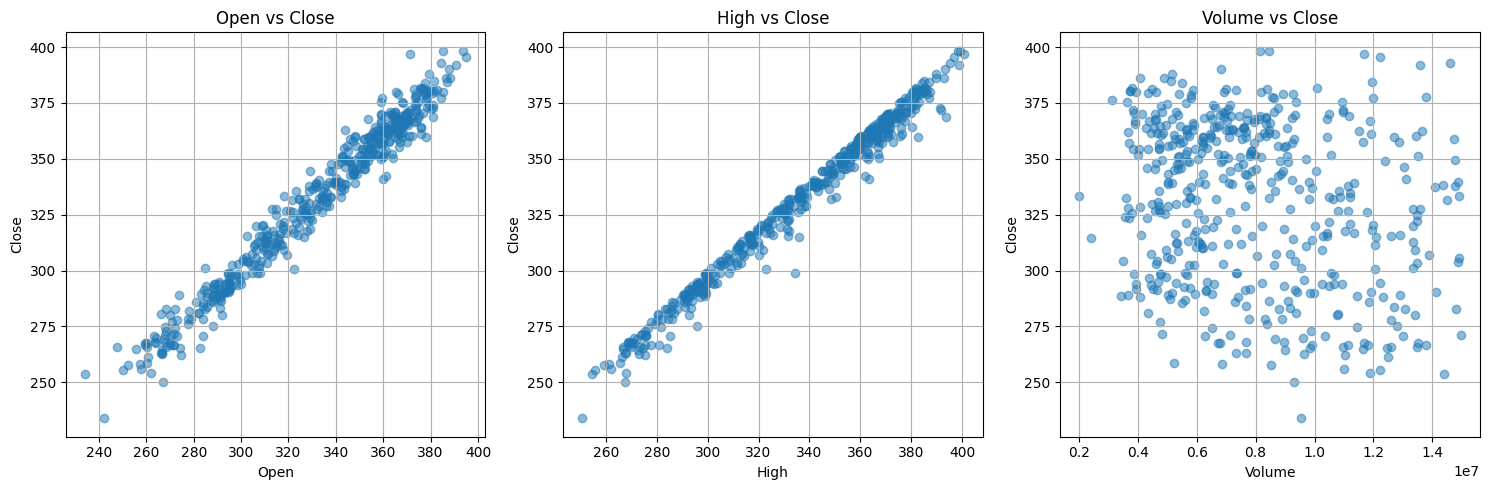

In [ ]:
predictor_variables = ['Open', 'High', 'Volume']


fig, axes = plt.subplots(nrows=1, ncols=len(predictor_variables), figsize=(15, 5))

for i, predictor in enumerate(predictor_variables):
    axes[i].scatter(df[predictor], df['Close'], alpha=0.5)
    axes[i].set_title(f'{predictor} vs Close')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Close')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

*  Open and High values closely track the movement of Close prices. Whenever there's an uptick in Close prices, we reliably see a corresponding increase in Open values.
*  Despite the removal of outliers, a discernible pattern remains elusive between Volume and Close. Even with outlier removal, there are segments of data that do not conform to an identifiable trend.

2. Continuous Vs Continuous- Correlation Matrix

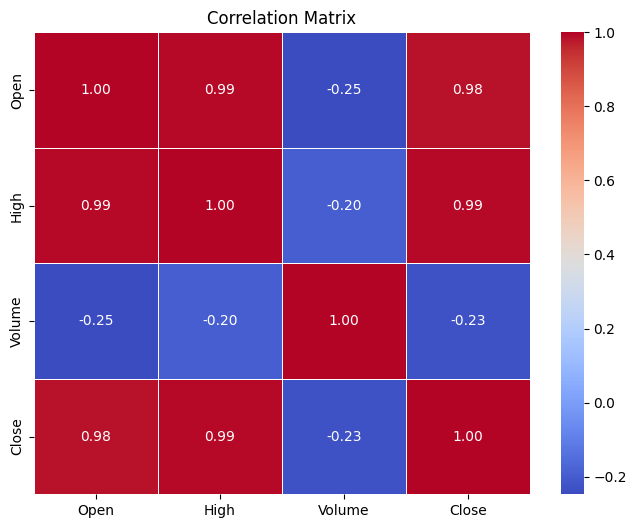

In [ ]:
continuous_variables = ['Open', 'High', 'Volume', 'Close']

correlation_matrix = df[continuous_variables].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the Correlation Matrix, we can observe that Open, Close and High are highly correlated with Close but Volume is failing in that aspect.

From the following Relationship diagrams we can conclude that:
*  Volume is more likely to create discrepancies in our machine learning model as it is highly uncorrelated with other variables.
*  Open, Close, and High are highly correlated with each other so we select them for our machine learning model.

Step 14: Data Pre-Processing for Machine Learning Model Development

*  Since our dataset does not contain ordinal categorical variables, other nominal categorical variables, or binary nominal categorical variables in string format, so we proceed with pre processing to ensure the data is in a suitable format.

*  As Volume is not necessary from the above exploration, we need to drop that column.

*  As the date column is categorical by nature as it represents a specific time units, but in respect to the stock exchange it is continuous, we perform ordinal encoding to make sure the data from the date column is extracted and the actual date column is dropped and splitted into three new columns as: year, month, and day


In [ ]:
# Removing Volume as a predictor

df.drop('Volume', axis=1, inplace=True)

In [ ]:
# Date Splitting
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


df.drop('Date', axis=1, inplace=True)
df.head()


,Open,High,Close,Year,Month,Day
0,262.000000,267.899994,254.259995,2018,2,5
1,247.699997,266.700012,265.720001,2018,2,6
2,266.579987,272.450012,264.559998,2018,2,7
3,267.079987,267.619995,250.100006,2018,2,8
5,252.139999,259.149994,257.950012,2018,2,12


Step 15: Machine Learning Model Development
*  For this step, we have to set the goal for our model to achieve, which is predicting the closing price.
*  We are choosing Regression model because of the continuous nature of our data.
*  We have to split the dataset into training and testing sets (80-20 split). 80% for training and 20% for testing the data.

In [ ]:
# Splitting the dataset to training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split

X = df[['Open', 'High']]  # Predictor Variables
y = df['Close']            # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 16: Standardization of data
*  Standardization of data is crucial for ensuring that all features are on the same scale, thereby preventing features with larger magnitudes from dominating the model's learning process

In [ ]:
# Standardization of data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 17: Fitting a machine learning model

1.  Linear Regressor
Linear Regression is used to predict the value of a variable based on the value of other variables. From our data, Close is the variable whose data is to be predicted and Open, High.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # Choose a regression algorithm
model.fit(X_train_scaled, y_train)

LinearRegression()

*  Model Evaluation:

In [ ]:
y_pred = model.predict(X_test_scaled)

*  Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 3.511396510563943
Mean Squared Error: 21.612970789019755


*  Model Validation and Accuracy Calculations

In [ ]:
# printing some sample values of prediction

TestingDataResults = pd.DataFrame(data=X_test, columns=['Open', 'High'])
TestingDataResults['Close'] = y_test
TestingDataResults['PredictedClose'] = np.round(y_pred)

In [ ]:
# Printing sample prediction values

print("\n##### Sample Prediction Values #####")
print(TestingDataResults.head())


##### Sample Prediction Values #####
           Open        High       Close  PredictedClose
124  337.230011  345.000000  344.500000           340.0
385  298.859985  303.549988  302.799988           299.0
64   325.899994  327.350006  326.890015           323.0
35   322.489990  322.899994  300.690002           318.0
522  377.769989  384.010010  383.790009           378.0


In [ ]:
# Calculating the error for each row

TestingDataResults['APE'] = 100 * (abs(TestingDataResults['Close'] - TestingDataResults['PredictedClose']) / TestingDataResults['Close'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print("\n##### Model Accuracy #####")
print("Mean Accuracy on test data:", Accuracy)  # Can be negative sometimes due to outliers
print("Median Accuracy on test data:", MedianAccuracy)


##### Model Accuracy #####
Mean Accuracy on test data: 98.89888369604927
Median Accuracy on test data: 99.08281414182176


In [ ]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return (100 - MAPE)

In [ ]:
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

*  Running 10-Fold Cross validation on a given algorithm
Passing full data X and y because the K-fold will split the data and automatically choose train/test


In [ ]:
Accuracy_Values = cross_val_score(model, X, y, cv=10, scoring=custom_Scoring)

print("\n##### Cross Validation Results #####")
print("Accuracy values for 10-fold Cross Validation:\n", Accuracy_Values)
print("Final Average Accuracy of the model:", round(Accuracy_Values.mean(), 2))



##### Cross Validation Results #####
Accuracy values for 10-fold Cross Validation:
 [98.74745684 99.15173363 99.10386618 98.43008122 99.17798184 99.29113988
 99.23992099 99.06715291 99.21875814 97.97287484]
Final Average Accuracy of the model: 98.94


*  Plot for Linear Regression

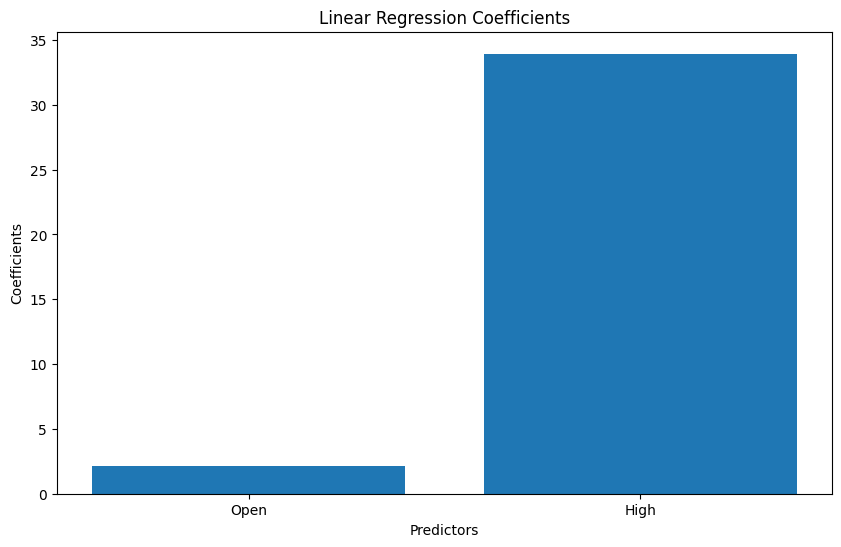

In [ ]:
# Get the coefficients for the original unscaled features
coefficients = model.coef_

# Create a bar plot for the coefficients
import matplotlib.pyplot as plt

# Plotting the coefficients for Linear Regression
coefficients = model.coef_
predictor_names = ['Open', 'High']

plt.figure(figsize=(10, 6))
plt.bar(['Open', 'High'], coefficients)
plt.title('Linear Regression Coefficients')
plt.xlabel('Predictors')
plt.ylabel('Coefficients')
plt.show()

*  Decision Tree Regresser

In [ ]:
RegModel = DecisionTreeRegressor(max_depth=5, criterion='friedman_mse')
DT = RegModel.fit(X_train, y_train)
prediction = DT.predict(X_test)

*  Model Evaluation and Validation for Decision Tree Regressor


Decision Tree Regressor Evaluation Metrics:
R2 Value: 0.9903852012194491


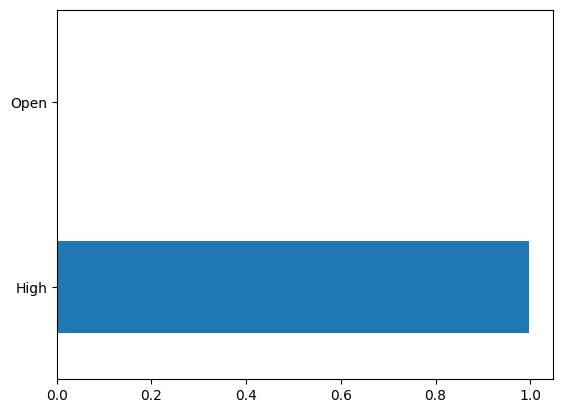

In [ ]:
# Model evaluation for Decision Tree Regressor
print("\nDecision Tree Regressor Evaluation Metrics:")
print('R2 Value:', r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(DT.feature_importances_, index=['Open', 'High'])
feature_importances.nlargest(10).plot(kind='barh')

# Model validation and accuracy calculations for Decision Tree Regressor
TestingDataResults['PredictedClose_DT'] = np.round(prediction)
TestingDataResults['APE_DT'] = 100 * (abs(TestingDataResults['Close'] - TestingDataResults['PredictedClose_DT']) / TestingDataResults['Close'])
MAPE_DT = np.mean(TestingDataResults['APE_DT'])
MedianMAPE_DT = np.median(TestingDataResults['APE_DT'])
Accuracy_DT = 100 - MAPE_DT
MedianAccuracy_DT = 100 - MedianMAPE_DT

In [ ]:
# Regressor Model Accuracy

print("\n  Regressor Model Accuracy:")
print("Mean Accuracy on test data:", Accuracy_DT)  # Can be negative sometimes due to outliers
print("Median Accuracy on test data:", MedianAccuracy_DT)


  Regressor Model Accuracy:
Mean Accuracy on test data: 98.61648508502945
Median Accuracy on test data: 98.96526702777473


*  Plotting the decision tree

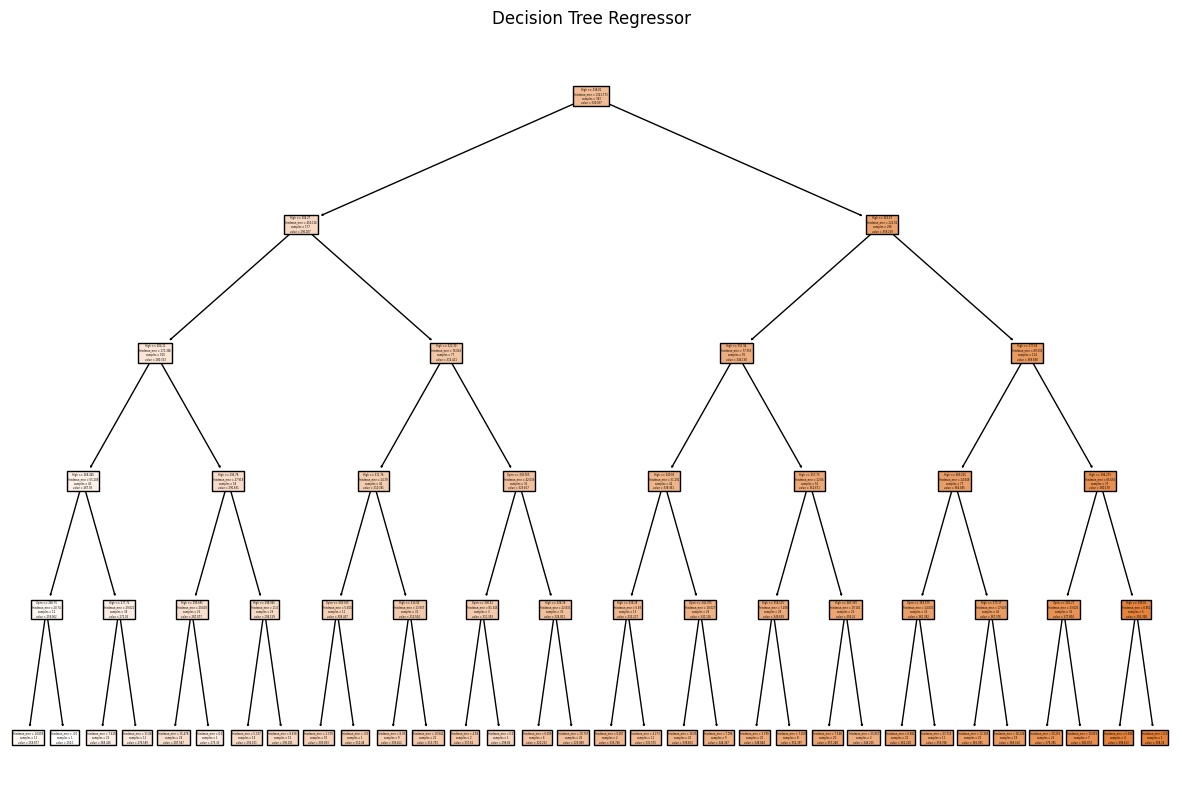

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(DT, feature_names=['Open', 'High'], filled=True)
plt.title('Decision Tree Regressor')
plt.show()

2.  Random Forest Regressor
*  The Random Forest Regressor is a training model that utilizes multiple decision trees to predict the value of a variable. Each decision tree in the ensemble independently predicts a value, and the average of these predictions is taken as the final predicted value.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Creating Random Forest Regressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400, criterion='friedman_mse')

*  Fitting the model on Training Data

In [ ]:
# Fitting the model on Training Data

RF = RegModel.fit(X_train, y_train)
prediction = RF.predict(X_test)

In [ ]:
# Model evaluation Metrics

mae_rf = mean_absolute_error(y_test, prediction)
mse_rf = mean_squared_error(y_test, prediction)

*  The code now calculates the mean absolute error, mean squared error, mean accuracy, and median accuracy for a Random Forest model's predictions on test data.

In [ ]:
# Model Validation and Accuracy Calculations
TestingDataResults['PredictedClose_RF'] = np.round(prediction)
TestingDataResults['APE_RF'] = 100 * (abs(TestingDataResults['Close'] - TestingDataResults['PredictedClose_RF']) / TestingDataResults['Close'])
MAPE_RF = np.mean(TestingDataResults['APE_RF'])
MedianMAPE_RF = np.median(TestingDataResults['APE_RF'])
Accuracy_RF = 100 - MAPE_RF
MedianAccuracy_RF = 100 - MedianMAPE_RF

print("Mean Absolute Error (Random Forest):", mae_rf)
print("Mean Squared Error (Random Forest):", mse_rf)
print("Mean Accuracy (Random Forest) on test data:", Accuracy_RF)
print("Median Accuracy (Random Forest) on test data:", MedianAccuracy_RF)


Mean Absolute Error (Random Forest): 4.179668165578779
Mean Squared Error (Random Forest): 33.07009703871494
Mean Accuracy (Random Forest) on test data: 98.68753245790596
Median Accuracy (Random Forest) on test data: 98.9097266312739


In [ ]:
# Custom Scoring MAPE calculation

def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return (100 - MAPE)

*  The code performs 10-fold cross-validation on a Random Forest Regressor model, training the dataset iteratively 9 times and testing it once, and then calculates the average accuracy of the model.

In [ ]:
# Running 10-Fold Cross validation on Random Forest Regressor
Accuracy_Values_RF = cross_val_score(RegModel, X, y, cv=10, scoring=make_scorer(Accuracy_Score, greater_is_better=True))
print("Accuracy values for 10-fold Cross Validation (Random Forest):\n", Accuracy_Values_RF)
print("Final Average Accuracy of the Random Forest model:", round(Accuracy_Values_RF.mean(), 2))


Accuracy values for 10-fold Cross Validation (Random Forest):
 [98.49686524 98.76426128 99.04658251 98.24957363 99.12920796 99.23897226
 99.10590201 98.88034615 99.17544389 97.955248  ]
Final Average Accuracy of the Random Forest model: 98.8


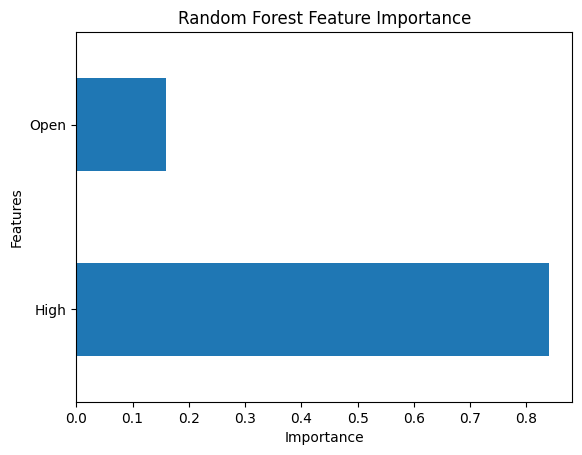

In [ ]:
# Plotting the feature importance for Random Forest
feature_importances_rf = pd.Series(RF.feature_importances_, index=['Open', 'High'])
feature_importances_rf.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

*  Both "High" and "Open" variables are crucial for predicting the "Close" value, yet "High" holds greater significance owing to its stronger correlation.

*  Choose one of the decision trees from the Random Forest Regressor.
For example, let's choose the 6th decision tree. The index starts from 0
*  And get the chosen Decision tree from Random Forest Regressor

In [ ]:
chosen_tree = 5

# Get the chosen Decision Tree from the Random Forest Regressor
chosen_tree_model = RF.estimators_[chosen_tree]

*  Plotting the Chosen Decision Tree

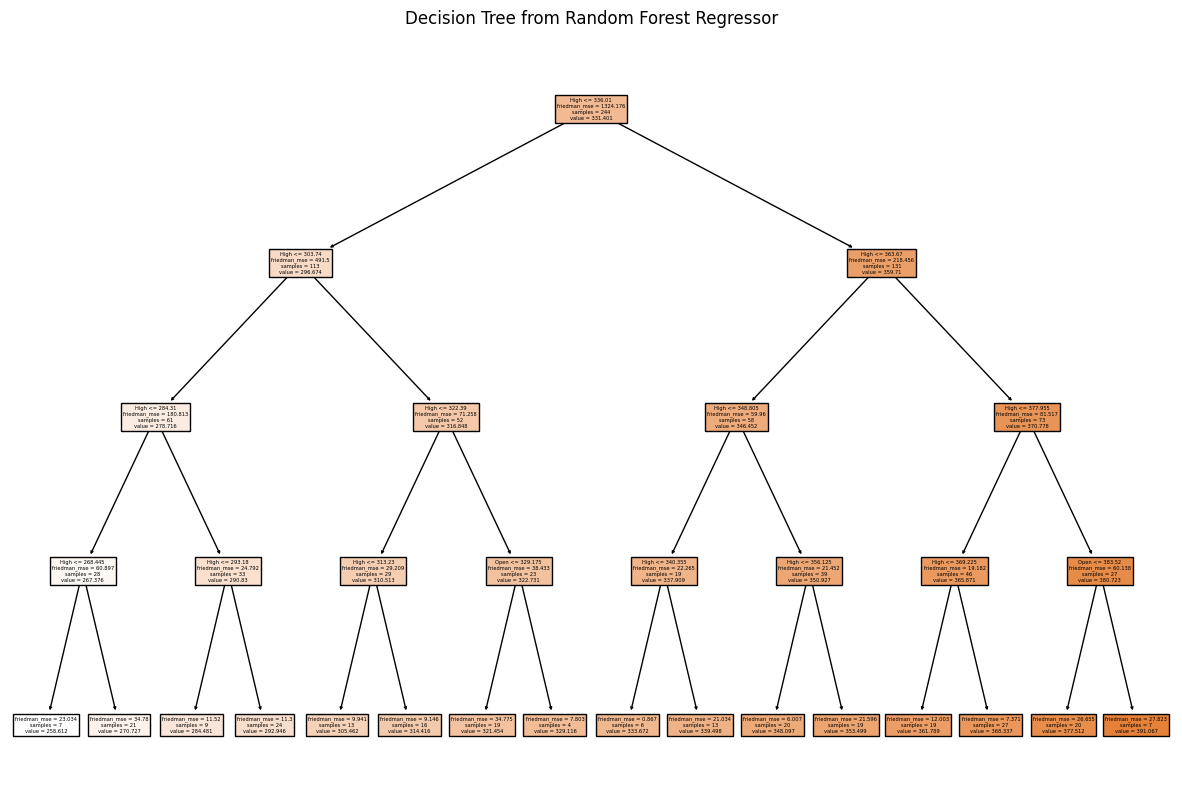

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(chosen_tree_model, feature_names=['Open', 'High'], filled=True)
plt.title('Decision Tree from Random Forest Regressor')
plt.show()

Step 18: AdaBoost Algorithm for ML/AI model building
*  The code now imports necessary modules for implementing AdaBoostRegressor with DecisionTreeRegressor as the base estimator, along with cross-validation and evaluation metrics.

In [ ]:
# AdaBoost (Boosting of multiple Decision Trees)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

*  Choosing Decision Tree with 3 levels as the weak learner


In [ ]:
DTR = DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, learning_rate=0.04)

*  Creating the model on Training Data

In [ ]:
AB = RegModel.fit(X_train, y_train)
prediction = AB.predict(X_test)

*  Measuring Goodness of fit in Training data


In [ ]:
print('R2 Value:', r2_score(y_train, AB.predict(X_train)))

R2 Value: 0.9833983792078094


*  Plotting the feature importance for Top 10 most important columns


<Axes: >

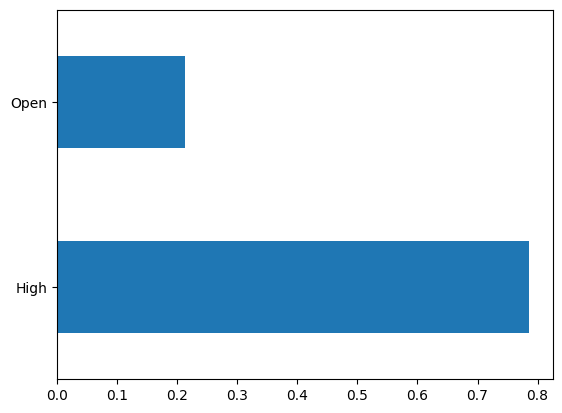

In [ ]:
feature_importances = pd.Series(AB.feature_importances_, index=['Open', 'High'])
feature_importances.nlargest(10).plot(kind='barh')

*  The code now sets up an AdaBoostRegressor using Decision Tree regressors with a maximum depth of 3 as weak learners, trains the model on the training data, evaluates the model's goodness of fit using the R2 value on the training data, and plots the feature importance for the top 10 most important columns.

*  Printing some sample values of prediction
*  Calculationg errors and running 10-fold cross validation and
*  Calculating the resulrts for each fold cross validation

In [ ]:
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=['Open', 'High'])
TestingDataResults['Close'] = y_test
TestingDataResults['PredictedClose'] = np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['Close'] - TestingDataResults['PredictedClose'])) / TestingDataResults['Close'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))


##### Model Validation and Accuracy Calculations ##########

Accuracy values for 10-fold Cross Validation:
 [98.74745684 99.15173363 99.10386618 98.43008122 99.17798184 99.29113988
 99.23992099 99.06715291 99.21875814 97.97287484]

Final Average Accuracy of the model: 98.94


In [ ]:
# Decision Tree:
# Get the decision tree from AdaBoostRegressor
individual_tree = RegModel.estimators_[0]  # Adjust the index as needed

*  Plotting the feature importance for AdaBoost Regressor

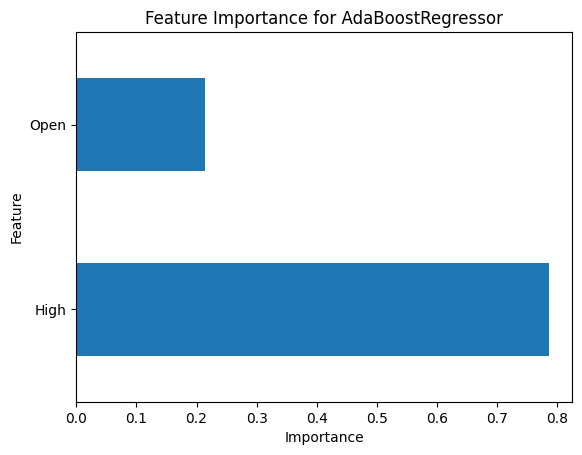

In [ ]:
feature_importances = pd.Series(AB.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance for AdaBoostRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

3.  XGBoost Regressor
*  XGBoost Regressor Training and Evaluation

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor

# Creating the XGBoost Regressor model
RegModel = XGBRegressor(max_depth=2,
learning_rate=0.1,
n_estimators=1000,
objective='reg:squarederror',  # Updated parameter
booster='gbtree')

*  Creating the model on Training Data and measuring goodness of fir in Training Data

In [ ]:
XGB = RegModel.fit(X_train, y_train)
prediction = XGB.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, XGB.predict(X_train)))

R2 Value: 0.9971475186057519


*  Plotting The feature importance for top 10 most important columns

<Axes: >

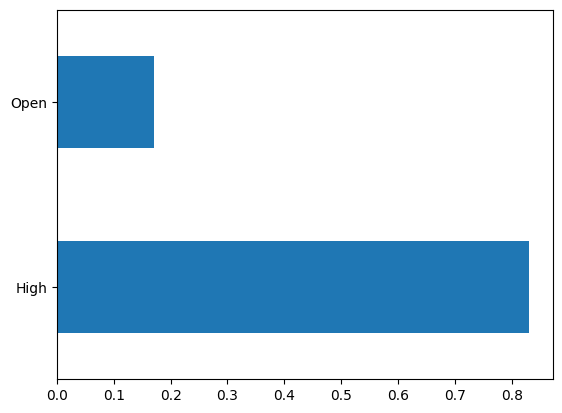

In [ ]:
feature_importances = pd.Series(XGB.feature_importances_, index=['Open', 'High'])
feature_importances.nlargest(10).plot(kind='barh')

Observation: From the plot diagram, we can see that High has the highest correlation with close at a value of over 0.8. Meanwhile, Open has a value thats over 0.1 but below 0.2.

*  Model Validation, Accuraty Calculations and 10-Fold cross Validation on the given algorithm

In [ ]:

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=['Open', 'High'])
TestingDataResults['Close'] = y_test
TestingDataResults['PredictedClose'] = np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (abs(TestingDataResults['Close'] - TestingDataResults['PredictedClose']) / TestingDataResults['Close'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE

# Printing accuracy metrics
print('Mean Accuracy on test data:', Accuracy)  # Can be negative sometimes due to outliers
print('Median Accuracy on test data:', 100 - MedianMAPE)

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))



Mean Accuracy on test data: 98.63184701385038
Median Accuracy on test data: 98.90601030788602

Accuracy values for 10-fold Cross Validation:
 [98.53212421 98.58638736 98.93696412 98.17123867 98.78837563 99.0764041
 98.99075968 98.35944251 99.05615948 97.95297222]

Final Average Accuracy of the model: 98.65


*  Getting Feature importances from the trained model

In [ ]:
feature_importances = pd.Series(XGB.feature_importances_, index=['Open', 'High'])

4.  K-Nearest Neighbor (KNN)
*  Importing KNN neighbours
*  Creating KNN regressor with 3 neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regressor with 3 neighbors

RegModel = KNeighborsRegressor(n_neighbors=3)

*  Creating the model on Training Data

In [ ]:
KNN = RegModel.fit(X_train, y_train)
prediction = KNN.predict(X_test)

from sklearn import metrics

*  Measuring goodness of fit in Training Data

In [ ]:
print('R2 Value:', metrics.r2_score(y_train, KNN.predict(X_train)))

R2 Value: 0.9900596162768842


*  Model Validation and Accuracy Calculations

In [ ]:
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=['Open', 'High'])
TestingDataResults['Close'] = y_test
TestingDataResults['PredictedClose'] = np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (abs(TestingDataResults['Close'] - TestingDataResults['PredictedClose']) / TestingDataResults['Close'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)  # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return (100 - MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))



##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 98.75891058341628
Median Accuracy on test data: 99.24431224888303

Accuracy values for 10-fold Cross Validation:
 [98.46590997 98.50114172 99.01718193 98.04677512 98.92725461 99.16746068
 98.89450549 98.68396671 99.22815628 98.06180908]

Final Average Accuracy of the model: 98.7


 5. Support Vector Machines (SVM)
 *  Importing SVM regressor
 *  Creating SVM regressor with parameters

In [ ]:
from sklearn import svm

# Create the SVM regressor with parameters
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

Printing the parameters of SVM

Training the SVM regressor on the training data (X_train and y_train).

In [ ]:
# Create the model on Training Data
SVM = RegModel.fit(X_train, y_train)
prediction = SVM.predict(X_test)

from sklearn import metrics

*  Measuring the Goodness of fit in Training data

In [ ]:
print('R2 Value:', metrics.r2_score(y_train, SVM.predict(X_train)))

R2 Value: 0.9863380618875851



*  Predictions are generated for the test data, and the Absolute Percentage Error (APE) is computed for each prediction.
*  Mean and Median Accuracy metrics are calculated based on the APE values to evaluate the model's performance.
*  A custom accuracy function, Accuracy_Score, is defined to calculate the accuracy of the model.
*  Cross-validation with 10 folds is performed using the custom accuracy scoring method to assess the model's robustness and reliability.
*  Results from the cross-validation provide insights into the model's average accuracy and overall performance.

In [ ]:
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data=X_test, columns=['Open', 'High'])
TestingDataResults['Close'] = y_test
TestingDataResults['PredictedClose'] = np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE'] = 100 * (abs(TestingDataResults['Close'] - TestingDataResults['PredictedClose']) / TestingDataResults['Close'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return (100 - MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values = cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



##### Model Validation and Accuracy Calculations ##########
Mean Accuracy on test data: 98.59219276594935
Median Accuracy on test data: 99.16986068205543

Accuracy values for 10-fold Cross Validation:
 [98.32497148 98.16905118 98.99656505 96.84673185 99.28186072 99.16857299
 99.09574141 98.63445554 99.26323996 97.64832671]

Final Average Accuracy of the model: 98.54
